In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# Load the GML file
gml_file = 'youtube_cyberbullying_graph.gml'
G = nx.read_gml(gml_file)

In [11]:
# Print basic information about the graph
print("Graph Info:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is directed: {G.is_directed()}")

Graph Info:
Number of nodes: 3518
Number of edges: 343446
Is directed: True


In [12]:
# Compute centrality measures
pr = nx.pagerank(G, alpha=0.8)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [13]:
# Compute eigenvector centrality with increased iterations and tolerance
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
except nx.PowerIterationFailedConvergence as e:
    print("\nEigenvector centrality failed to converge. Consider further increasing 'max_iter' or 'tol'.")
    eigenvector_centrality = {}

In [14]:
# Function to print the top N nodes for a given centrality measure
def print_top_nodes(centrality_name, centrality_dict, n=10):
    print(f"\nTop {n} nodes by {centrality_name}:")
    top_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    for node, centrality in top_nodes:
        print(f"Node: {node}, {centrality_name}: {centrality:.4f}")
    return top_nodes

In [15]:
# Function to plot top nodes for a given centrality measure
def plot_top_nodes(centrality_name, top_nodes):
    nodes, values = zip(*top_nodes)
    plt.figure(figsize=(10, 6))
    plt.bar(nodes, values, color='skyblue')
    plt.xlabel("Node")
    plt.ylabel(centrality_name)
    plt.title(f"Top Nodes by {centrality_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Top 10 nodes by PageRank:
Node: 3517, PageRank: 0.0438
Node: 3516, PageRank: 0.0243
Node: 3512, PageRank: 0.0193
Node: 3513, PageRank: 0.0174
Node: 3472, PageRank: 0.0121
Node: 3510, PageRank: 0.0102
Node: 3490, PageRank: 0.0089
Node: 3508, PageRank: 0.0088
Node: 3493, PageRank: 0.0083
Node: 3478, PageRank: 0.0072


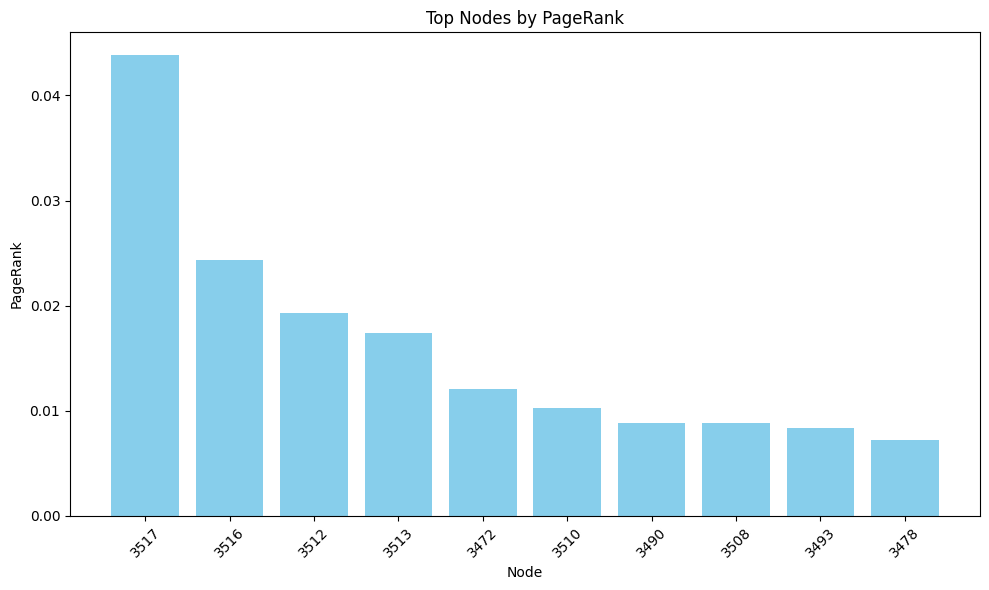


Top 10 nodes by Degree Centrality:
Node: 214, Degree Centrality: 0.3079
Node: 3472, Degree Centrality: 0.3011
Node: 2225, Degree Centrality: 0.2974
Node: 1919, Degree Centrality: 0.2855
Node: 939, Degree Centrality: 0.2764
Node: 367, Degree Centrality: 0.2735
Node: 185, Degree Centrality: 0.2732
Node: 627, Degree Centrality: 0.2710
Node: 486, Degree Centrality: 0.2695
Node: 41, Degree Centrality: 0.2693


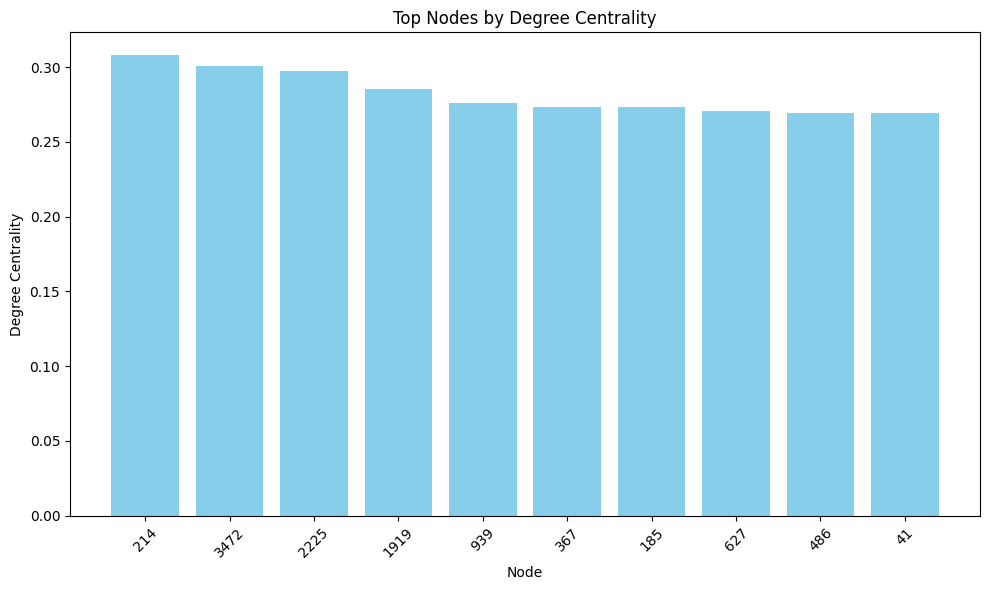


Top 10 nodes by Closeness Centrality:
Node: 3472, Closeness Centrality: 0.3406
Node: 3512, Closeness Centrality: 0.3114
Node: 3490, Closeness Centrality: 0.3099
Node: 3478, Closeness Centrality: 0.3087
Node: 3331, Closeness Centrality: 0.2981
Node: 3376, Closeness Centrality: 0.2968
Node: 3403, Closeness Centrality: 0.2965
Node: 3233, Closeness Centrality: 0.2946
Node: 3493, Closeness Centrality: 0.2943
Node: 3343, Closeness Centrality: 0.2942


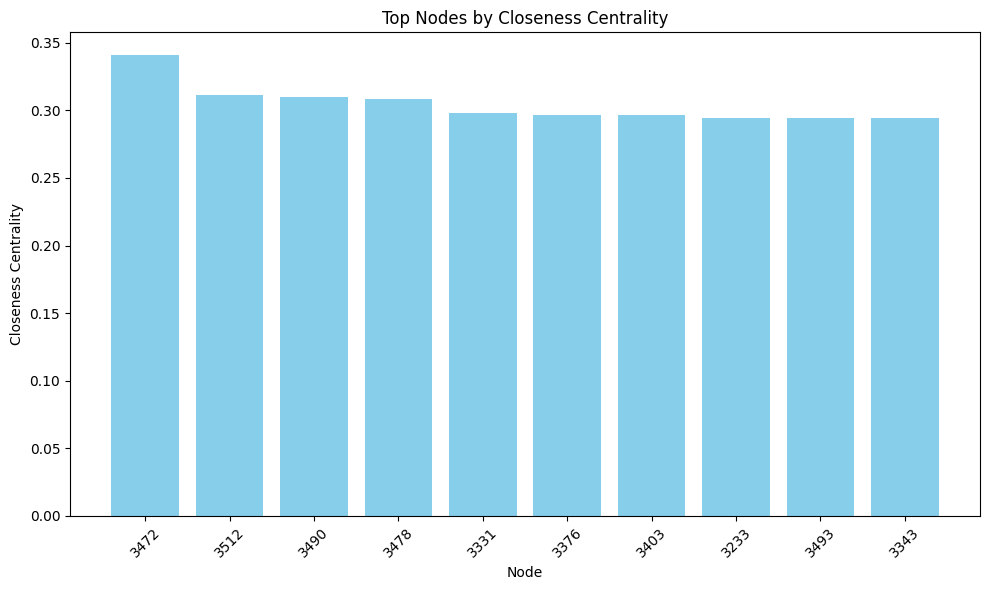


Top 10 nodes by Betweenness Centrality:
Node: 2225, Betweenness Centrality: 0.0035
Node: 1490, Betweenness Centrality: 0.0021
Node: 1919, Betweenness Centrality: 0.0017
Node: 1668, Betweenness Centrality: 0.0017
Node: 939, Betweenness Centrality: 0.0015
Node: 1704, Betweenness Centrality: 0.0012
Node: 1857, Betweenness Centrality: 0.0011
Node: 2026, Betweenness Centrality: 0.0011
Node: 2145, Betweenness Centrality: 0.0011
Node: 1858, Betweenness Centrality: 0.0010


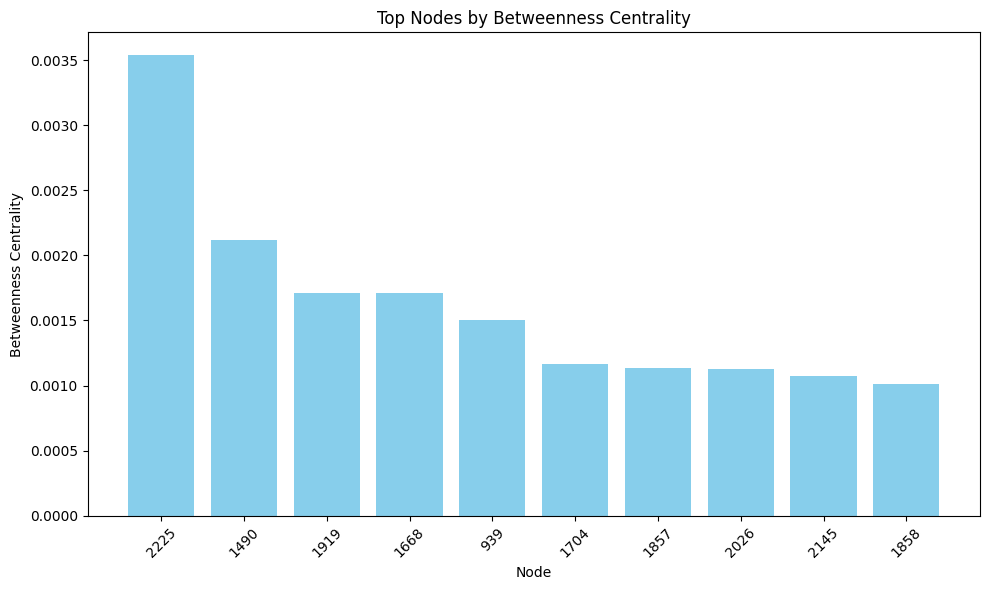


Top 10 nodes by Eigenvector Centrality:
Node: 3517, Eigenvector Centrality: 0.7447
Node: 3516, Eigenvector Centrality: 0.4954
Node: 3513, Eigenvector Centrality: 0.3294
Node: 3512, Eigenvector Centrality: 0.2340
Node: 3510, Eigenvector Centrality: 0.1404
Node: 3508, Eigenvector Centrality: 0.0933
Node: 3493, Eigenvector Centrality: 0.0619
Node: 3491, Eigenvector Centrality: 0.0411
Node: 3498, Eigenvector Centrality: 0.0329
Node: 3490, Eigenvector Centrality: 0.0312


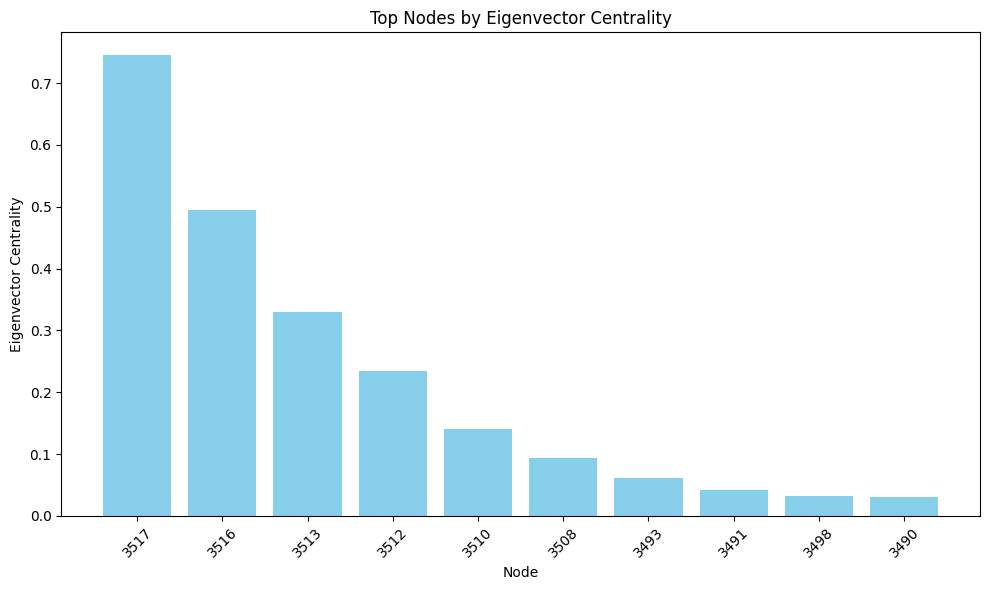

In [16]:
# Print and plot the top 10 nodes for each centrality measure
top_pagerank = print_top_nodes("PageRank", pr, 10)
plot_top_nodes("PageRank", top_pagerank)

top_degree = print_top_nodes("Degree Centrality", degree_centrality, 10)
plot_top_nodes("Degree Centrality", top_degree)

top_closeness = print_top_nodes("Closeness Centrality", closeness_centrality, 10)
plot_top_nodes("Closeness Centrality", top_closeness)

top_betweenness = print_top_nodes("Betweenness Centrality", betweenness_centrality, 10)
plot_top_nodes("Betweenness Centrality", top_betweenness)

if eigenvector_centrality:
    top_eigenvector = print_top_nodes("Eigenvector Centrality", eigenvector_centrality, 10)
    plot_top_nodes("Eigenvector Centrality", top_eigenvector)

In [17]:
# Save the centrality measures to a CSV file
centrality_data = {
    "Node": list(pr.keys()),
    "PageRank": list(pr.values()),
    "Degree Centrality": list(degree_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
}
if eigenvector_centrality:
    centrality_data["Eigenvector Centrality"] = list(eigenvector_centrality.values())

centrality_df = pd.DataFrame(centrality_data)
centrality_df.to_csv('graph_centrality_measures.csv', index=False)
print("\nCentrality measures saved to 'graph_centrality_measures.csv'")


Centrality measures saved to 'graph_centrality_measures.csv'
